## Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [2]:
tensorflow.__version__

'2.8.0'

In [3]:
df = pd.read_csv(r"C:\Users\Snehal Thakur\OneDrive\Documents\Trainings\Datasets\AI_Ready_DMSP_Data.csv")
df.head()

,Datetimes,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,1987-01-12 12:57:00,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,1987-01-12 12:58:00,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,1987-01-12 13:01:00,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,1987-01-12 13:02:00,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,1987-01-12 13:03:00,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015


In [4]:
df.shape

(1945887, 154)

In [5]:
df.ELE_TOTAL_ENERGY_FLUX.value_counts()

6.793631e+07    1881
1.715917e+08    1645
4.491186e+07    1602
4.792066e+07    1476
9.615005e+07    1154
                ... 
2.194215e+08       1
4.535183e+08       1
2.194220e+08       1
5.617212e+10       1
5.368710e+08       1
Name: ELE_TOTAL_ENERGY_FLUX, Length: 1408105, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945887 entries, 0 to 1945886
Columns: 154 entries, Datetimes to newell_5min
dtypes: float64(153), object(1)
memory usage: 2.2+ GB


In [7]:
df.describe()

,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,sin_doy,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
count,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,...,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06,1.945887e+06
mean,6.570637e+01,1.216816e+01,3.482163e+11,3.808472e-01,6.766701e+02,5.215987e-01,1.525724e+01,-1.546309e-02,-5.730379e-04,-5.885964e-02,...,1.164216e+02,-6.775783e+01,4.866342e+01,-7.553068e+00,5.667985e-01,4.146902e+02,-4.136018e+02,1.714139e+00,1.830140e+04,2.584998e+03
std,1.113038e+01,6.183665e+00,9.502920e+13,3.843252e-01,1.643206e+03,5.285720e-01,1.859437e+00,7.043835e-01,7.096513e-01,6.857227e-01,...,1.140824e+02,8.255277e+01,4.434815e+01,1.239796e+01,9.291724e-01,8.636187e+01,8.614378e+01,1.139435e+00,1.569150e+04,2.213171e+03
min,4.500001e+01,5.522087e-05,2.632692e+06,4.849234e-02,3.000000e+01,6.364828e-02,6.000000e+00,-1.000000e+00,-1.000000e+00,-9.999907e-01,...,2.000000e+00,-1.014000e+03,-2.900000e+01,-1.350000e+02,-8.310000e+00,2.097000e+02,-8.948000e+02,2.000000e-02,0.000000e+00,0.000000e+00
25%,5.639841e+01,7.020661e+00,1.695103e+08,1.498974e-01,4.673054e+01,1.985475e-01,1.300000e+01,-7.163019e-01,-7.132504e-01,-7.176769e-01,...,4.000000e+01,-8.900000e+01,1.800000e+01,-1.400000e+01,1.000000e-02,3.515000e+02,-4.582000e+02,1.030000e+00,6.125974e+03,6.412949e+02
50%,6.683312e+01,1.059154e+01,5.541485e+08,2.598311e-01,9.489876e+01,3.600449e-01,1.500000e+01,-3.053851e-02,-1.836970e-16,-1.116590e-01,...,7.200000e+01,-3.300000e+01,3.400000e+01,-7.000000e+00,4.100000e-01,4.003000e+02,-3.992000e+02,1.440000e+00,1.485265e+04,2.092684e+03
75%,7.455943e+01,1.795850e+01,1.304165e+10,4.544635e-01,4.302134e+02,6.252084e-01,1.700000e+01,6.883546e-01,7.132504e-01,6.152846e-01,...,1.540000e+02,-1.600000e+01,6.500000e+01,0.000000e+00,1.060000e+00,4.595000e+02,-3.506000e+02,2.070000e+00,2.641958e+04,4.088414e+03
max,8.998340e+01,2.399989e+01,5.648257e+16,8.695798e+00,3.000000e+04,1.210898e+01,1.800000e+01,1.000000e+00,1.000000e+00,9.999907e-01,...,1.262000e+03,4.000000e+01,4.910000e+02,1.010000e+02,1.432000e+01,9.033000e+02,-2.088000e+02,4.576000e+01,9.997738e+04,8.999590e+03


In [8]:
col_list = df.select_dtypes(include=['object']).columns.to_list()
df[col_list]

,Datetimes
0,1987-01-12 12:57:00
1,1987-01-12 12:58:00
2,1987-01-12 13:01:00
3,1987-01-12 13:02:00
4,1987-01-12 13:03:00
...,...
1945882,2014-12-31 22:50:00
1945883,2014-12-31 22:51:00
1945884,2014-12-31 22:52:00
1945885,2014-12-31 22:53:00


In [9]:
df_withoutDatetime = df.drop("Datetimes",axis=1)
df_withoutDatetime

,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,sin_doy,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,51.143220,5.664024,2.057827e+08,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,2.051045e-01,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,54.137207,5.535848,2.509837e+08,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,2.051045e-01,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,62.928176,5.031172,4.469146e+08,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,2.051045e-01,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,65.719631,4.794780,1.934849e+10,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,2.051045e-01,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,68.392364,4.507448,3.913337e+11,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,2.051045e-01,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945882,57.581441,19.667482,2.231577e+08,0.196140,39.70994,0.274218,18.0,-0.300706,0.953717,6.432491e-16,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945883,54.923541,19.585868,3.074197e+08,0.190974,42.31005,0.257437,18.0,-0.296542,0.955020,6.432491e-16,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945884,52.270565,19.512302,1.917582e+08,0.221838,41.81216,0.299996,18.0,-0.292372,0.956305,6.432491e-16,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945885,49.619169,19.445679,2.265864e+08,0.203549,39.70088,0.278064,18.0,-0.288196,0.957571,6.432491e-16,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021


In [10]:
df_withoutDatetime['ELE_TOTAL_ENERGY_FLUX'].head()

0    2.057827e+08
1    2.509837e+08
2    4.469146e+08
3    1.934849e+10
4    3.913337e+11
Name: ELE_TOTAL_ENERGY_FLUX, dtype: float64

In [11]:
df_features = df_withoutDatetime.drop(["ELE_TOTAL_ENERGY_FLUX"],axis=1)
df_features

,SC_AACGM_LAT,SC_AACGM_LTIME,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,ID_SC,sin_ut,cos_ut,sin_doy,cos_doy,...,AE_5min,AL_5min,AU_5min,SymH_5min,PC_5min,vsw_5min,vx_5min,psw_5min,borovsky_5min,newell_5min
0,51.143220,5.664024,0.411230,39.89341,0.411485,6.0,-0.246153,-0.969231,2.051045e-01,0.97874,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
1,54.137207,5.535848,0.478268,40.82392,0.478568,6.0,-0.250380,-0.968148,2.051045e-01,0.97874,...,86.0,-61.0,25.0,3.0,0.77,356.0,-355.5,2.96,17439.640589,2489.686963
2,62.928176,5.031172,0.603362,143.77360,0.604023,6.0,-0.263031,-0.964787,2.051045e-01,0.97874,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
3,65.719631,4.794780,0.103648,820.36560,0.103671,6.0,-0.267238,-0.963630,2.051045e-01,0.97874,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
4,68.392364,4.507448,0.114959,5291.57100,0.114959,6.0,-0.271440,-0.962455,2.051045e-01,0.97874,...,82.0,-58.0,24.0,3.0,0.77,354.7,-354.1,3.20,14199.368957,1847.748015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945882,57.581441,19.667482,0.196140,39.70994,0.274218,18.0,-0.300706,0.953717,6.432491e-16,1.00000,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945883,54.923541,19.585868,0.190974,42.31005,0.257437,18.0,-0.296542,0.955020,6.432491e-16,1.00000,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945884,52.270565,19.512302,0.221838,41.81216,0.299996,18.0,-0.292372,0.956305,6.432491e-16,1.00000,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021
1945885,49.619169,19.445679,0.203549,39.70088,0.278064,18.0,-0.288196,0.957571,6.432491e-16,1.00000,...,52.0,-14.0,38.0,-11.0,-0.12,528.8,-528.3,2.14,8055.887423,622.199021


In [12]:
df_label = df_withoutDatetime["ELE_TOTAL_ENERGY_FLUX"]
df_label

0          2.057827e+08
1          2.509837e+08
2          4.469146e+08
3          1.934849e+10
4          3.913337e+11
               ...     
1945882    2.231577e+08
1945883    3.074197e+08
1945884    1.917582e+08
1945885    2.265864e+08
1945886    1.160843e+09
Name: ELE_TOTAL_ENERGY_FLUX, Length: 1945887, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.25, random_state=46, shuffle=True)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=46, shuffle=True)

In [15]:
columns=[ i for i in X_train.columns]
columns

['SC_AACGM_LAT',
 'SC_AACGM_LTIME',
 'ELE_TOTAL_ENERGY_FLUX_STD',
 'ELE_AVG_ENERGY',
 'ELE_AVG_ENERGY_STD',
 'ID_SC',
 'sin_ut',
 'cos_ut',
 'sin_doy',
 'cos_doy',
 'sin_SC_AACGM_LTIME',
 'cos_SC_AACGM_LTIME',
 'F107',
 'Bz',
 'By',
 'Bx',
 'AE',
 'AL',
 'AU',
 'SymH',
 'PC',
 'vsw',
 'vx',
 'psw',
 'borovsky',
 'newell',
 'F107_6hr',
 'Bz_6hr',
 'By_6hr',
 'Bx_6hr',
 'AE_6hr',
 'AL_6hr',
 'AU_6hr',
 'SymH_6hr',
 'PC_6hr',
 'vsw_6hr',
 'vx_6hr',
 'psw_6hr',
 'borovsky_6hr',
 'newell_6hr',
 'F107_5hr',
 'Bz_5hr',
 'By_5hr',
 'Bx_5hr',
 'AE_5hr',
 'AL_5hr',
 'AU_5hr',
 'SymH_5hr',
 'PC_5hr',
 'vsw_5hr',
 'vx_5hr',
 'psw_5hr',
 'borovsky_5hr',
 'newell_5hr',
 'F107_3hr',
 'Bz_3hr',
 'By_3hr',
 'Bx_3hr',
 'AE_3hr',
 'AL_3hr',
 'AU_3hr',
 'SymH_3hr',
 'PC_3hr',
 'vsw_3hr',
 'vx_3hr',
 'psw_3hr',
 'borovsky_3hr',
 'newell_3hr',
 'F107_1hr',
 'Bz_1hr',
 'By_1hr',
 'Bx_1hr',
 'AE_1hr',
 'AL_1hr',
 'AU_1hr',
 'SymH_1hr',
 'PC_1hr',
 'vsw_1hr',
 'vx_1hr',
 'psw_1hr',
 'borovsky_1hr',
 'newell_1h

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
# prepare_features
def prepare_features(X_train, X_val, X_test, col):
    scaler = StandardScaler()
    scaler.fit(X_train[col])
    X_train_enc[col] = scaler.transform(X_train[col])
    X_val_enc[col] = scaler.transform(X_val[col])
    X_test_enc[col] = scaler.transform(X_test[col])
    return X_train_enc, X_val_enc, X_test_enc

In [18]:
# prepare_features
def prepare_features(X_train, X_val, X_test, col):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_enc = scaler.transform(X_train)
    X_val_enc = scaler.transform(X_val)
    X_test_enc = scaler.transform(X_test)
    return X_train_enc, X_val_enc, X_test_enc

In [19]:
X_train_enc, X_val_enc, X_test_enc = prepare_features(X_train, X_val ,X_test, columns)

In [20]:
X_train_enc.shape[1]

152

In [21]:
device_name = tensorflow.test.gpu_device_name()
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [44]:
with tensorflow.device('/device:GPU:0'):
    model = keras.Sequential()
    model.add(Dense(1024, kernel_initializer='normal', input_dim=X_train_enc.shape[1],activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(512,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(256,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(128,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(1,kernel_initializer='normal', activation='linear'))
    # TODO: Compile the model using a loss function and an optimizer.
    # opt = keras.optimizers.Adam(learning_rate=0.0001)
    opt = keras.optimizers.Adam(0.001, clipnorm=1.)
    model.compile(loss=["mean_squared_error"], optimizer=opt, metrics=['mean_squared_error'])
    #     model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1024)              156672    
                                                                 
 dropout_24 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_23 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dropout_25 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_24 (Bat  (None, 512)              2048      
 chNormalization)                                     

In [35]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [45]:
with tensorflow.device('/device:GPU:0'):
    # train the model
    history = model.fit(X_train_enc, y_train,
      batch_size=300,
      epochs=20,
      verbose=1,validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/20
3889/3892 [============================>.] - ETA: 0s - loss: 3935415984473178208938754048.0000 - mean_squared_error: 3935415984473178208938754048.0000
Epoch 1: val_loss did not improve from 14682719297182402875624521728.00000
3892/3892 [==============================] - 46s 11ms/step - loss: 3932611489078163998387470336.0000 - mean_squared_error: 3932611489078163998387470336.0000 - val_loss: 14682719297182402875624521728.0000 - val_mean_squared_error: 14682719297182402875624521728.0000
Epoch 2/20
3888/3892 [============================>.] - ETA: 0s - loss: 3936448116697590405770772480.0000 - mean_squared_error: 3936448411845495585123598336.0000
Epoch 2: val_loss did not improve from 14682719297182402875624521728.00000
3892/3892 [==============================] - 42s 11ms/step - loss: 3932631559135716194379628544.0000 - mean_squared_error: 3932631854283621373732454400.0000 - val_loss: 14682719297182402875624521728.0000 - val_mean_squared_error: 14682719297182402875624521728.0

In [46]:
model.evaluate(X_test_enc, y_test)

7602/7602 [==============================] - 18s 2ms/step - loss: 10750565287357266874117128192.0000 - mean_squared_error: 10750565287357266874117128192.0000


[1.0750565287357267e+28, 1.0750565287357267e+28]

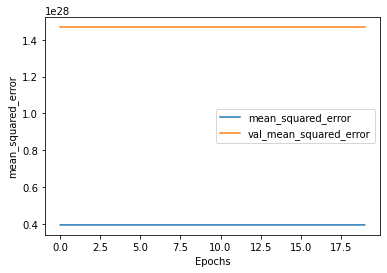

In [38]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [40]:
# !pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [43]:
# from tensorflow.keras.utils import plot_model
# plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
# from sklearn.metrics import mean_squared_error
# print("MSE",mean_squared_error(y_test,y_pred))
# print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test,y_pred)
# print(r2)